<a href="https://colab.research.google.com/github/shravanibhojane/EmployeeAttrition/blob/main/EmployeeAttrition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
import pandas as pd
import numpy as np

df = pd.read_csv('/content/employee_attrition.csv')

print(df.info(2))
print(df.head(2))
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 29 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   EmployeeID               1000 non-null   int64 
 1   Age                      1000 non-null   int64 
 2   Gender                   1000 non-null   object
 3   MaritalStatus            1000 non-null   object
 4   Department               1000 non-null   object
 5   JobRole                  1000 non-null   object
 6   Salary                   1000 non-null   int64 
 7   YearsAtCompany           1000 non-null   int64 
 8   YearsInCurrentRole       1000 non-null   int64 
 9   JobSatisfaction          1000 non-null   int64 
 10  WorkLifeBalance          1000 non-null   int64 
 11  Overtime                 1000 non-null   object
 12  DistanceFromHome         1000 non-null   int64 
 13  TrainingTimesLastYear    1000 non-null   int64 
 14  PerformanceRating        1000 non-null   

In [15]:
from sklearn.preprocessing import LabelEncoder

categorical_cols= ["Gender", "MaritalStatus", "Department", "JobRole", "Overtime", "Education", "Attrition"]
encoder = LabelEncoder()

for col in categorical_cols:
  df[col] = encoder.fit_transform(df[col])


print(df.head(2))

   EmployeeID  Age  Gender  MaritalStatus  Department  JobRole  Salary  \
0           1   50       0              1           3        4   49942   
1           2   36       1              0           4        0   50862   

   YearsAtCompany  YearsInCurrentRole  JobSatisfaction  ...  Education  \
0              25                  16                4  ...          1   
1               8                  19                2  ...          1   

   EnvironmentSatisfaction  MonthlyIncome  JobLevel  YearsSinceLastPromotion  \
0                        3          10084         3                       11   
1                        4          15455         3                        9   

   YearsWithCurrManager  HourlyRate  DailyRate  MonthlyRate  Attrition  
0                    14          17        696         6691          0  
1                    11          83        254         9669          0  

[2 rows x 29 columns]


In [16]:
X = df.drop(columns=["Attrition", "EmployeeID"])
y = df["Attrition"]

In [17]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [18]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()

model.fit(X_train, y_train)

RandomForestClassifier()

In [19]:
from sklearn.metrics import accuracy_score, classification_report
y_pred = model.predict(X_test)

print("Accuracy:",accuracy_score (y_test, y_pred))
print("Classification Report:\n",classification_report(y_test, y_pred))

Accuracy: 0.485
Classification Report:
               precision    recall  f1-score   support

           0       0.50      0.54      0.52       102
           1       0.47      0.43      0.45        98

    accuracy                           0.48       200
   macro avg       0.48      0.48      0.48       200
weighted avg       0.48      0.48      0.48       200



In [20]:
new_employee = X_test.iloc[[0]]
prediction = model.predict(new_employee)

print("Predicted Attrition :", "Yes"if prediction[0]== 1 else "No" )

Predicted Attrition : No


In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as XGBClassifier

In [22]:
le = LabelEncoder()
y = le.fit_transform(y)

In [23]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [24]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [27]:
print(XGBClassifier)

<module 'xgboost' from '/usr/local/lib/python3.11/dist-packages/xgboost/__init__.py'>


In [29]:
from xgboost import XGBClassifier

xgb_model = XGBClassifier(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=5,
    random_state=42
)

In [30]:
xgb_model.fit(X_train_resampled,y_train_resampled)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [32]:
y_test = xgb_model.predict(X_test)

In [33]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.55
Classification Report:
               precision    recall  f1-score   support

           0       0.59      0.60      0.59       109
           1       0.51      0.49      0.50        91

    accuracy                           0.55       200
   macro avg       0.55      0.55      0.55       200
weighted avg       0.55      0.55      0.55       200



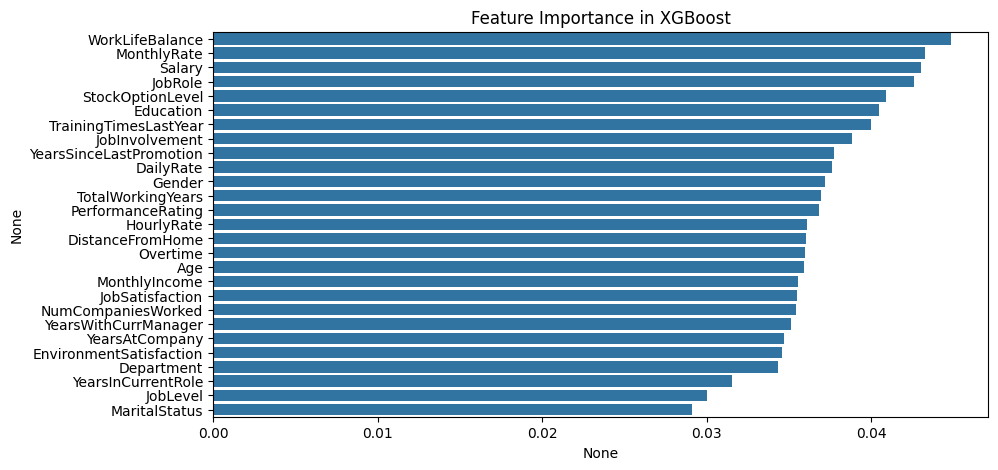

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

feature_importances = pd.Series(xgb_model.feature_importances_, index=X.columns)
plt.figure(figsize=(10, 5))
sns.barplot(x=feature_importances.sort_values(ascending=False), y=feature_importances.sort_values(ascending=False).index)
plt.title("Feature Importance in XGBoost")
plt.show()